# Linear models - Beyond linear separations

In this notebook, we will illustrate that using the right preprocessing, the separation of a linear model can make this model flexible enough to fit data where the link between the features and the target is non-linear.

In [1]:
# temporary fix to avoid spurious warning raised in scikit-learn 1.0.0
# it will be solved in scikit-learn 1.0.1
import warnings
warnings.filterwarnings("ignore", message="X has feature names.*")
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")

In [2]:
import sklearn

sklearn.set_config(display="diagram")

## Limitation of linear separation

We will create a complex classification toy dataset where we expect a linear model to not work.
Let's generate the dataset and make a scatter plot of the dataset.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1),
                     columns=feature_names + [target_name])
moons[target_name] = moons[target_name].astype("category")
X, y = moons[feature_names], moons[target_name]

In [4]:
import seaborn as sns
sns.set_context("poster")

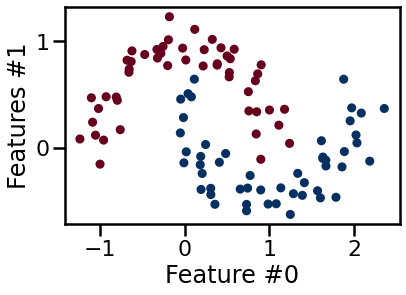

In [5]:
import matplotlib.pyplot as plt

_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu,
)

Looking at the dataset, we observe that a linear separation will not do a good enough job to discriminate both classes.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Fit a <tt>LogisticRegression</tt> model on the dataset.</li>
        <li>Using the helper class <tt>helper.plotting.DecisionBoundaryDisplay</tt>, draw the decision boundary of the model.</li>
    </ul>
</div>

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

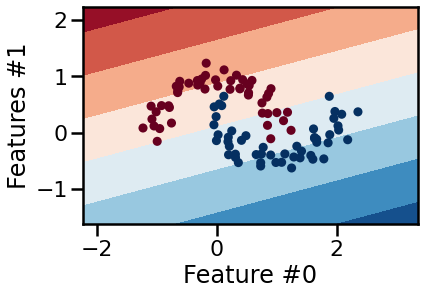

In [7]:
from helper.plotting import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    model, X, cmap=plt.cm.RdBu,
)
_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu, ax=display.ax_
)

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Fit a <tt>LogisticRegression</tt> model on the dataset but this time insert a <tt>sklearn.preprocessing.PolynomialFeatures</tt> transformer.</li>
        <li>Using the helper class <tt>helper.plotting.DecisionBoundaryDisplay</tt>, draw the decision boundary of the model.</li>
    </ul>
</div>

In [8]:
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(
    PolynomialFeatures(degree=3), StandardScaler(), LogisticRegression()
)
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

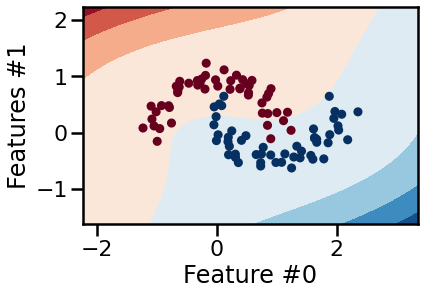

In [9]:
display = DecisionBoundaryDisplay.from_estimator(
    model, X, cmap=plt.cm.RdBu,
)
_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu, ax=display.ax_
)

## What about SVM

Another family of linear algorithms are Support Vector Machine (SVM). The training paradigm is different from logistic regression. This model try to find the hyperplane that maximize the margin to the point close to the hyperplane.

In [10]:
from sklearn.svm import LinearSVC

model = make_pipeline(StandardScaler(), LinearSVC())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

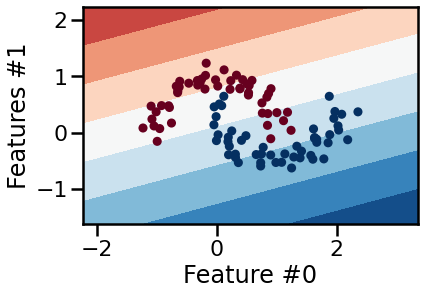

In [11]:
display = DecisionBoundaryDisplay.from_estimator(
    model, X, cmap=plt.cm.RdBu,
)
_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu, ax=display.ax_
)

What made SVM interesting at some point was their capability to become non-linear using a so-called "kernel trick". The kernel trick allows to project the data in an higher dimensional space but without to build explicitely the kernel itself and only computing the dot product in this space. The class `SVC` allows to use such kernel. We will use a polynomial kernel to create something similar to the previous pipeline that used a `PolynomialFeatures`.

In [12]:
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3))
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

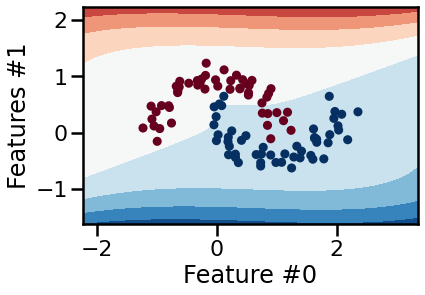

In [13]:
display = DecisionBoundaryDisplay.from_estimator(
    model, X, cmap=plt.cm.RdBu,
)
_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu, ax=display.ax_
)

One can even used different type of kernel, for instance Radial Basis Function (RBF).

In [14]:
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

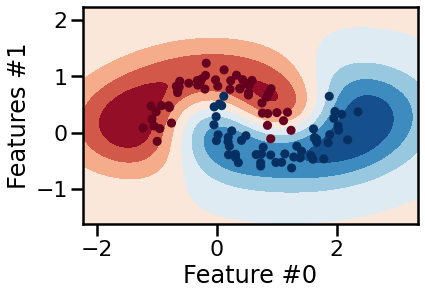

In [15]:
display = DecisionBoundaryDisplay.from_estimator(
    model, X, cmap=plt.cm.RdBu,
)
_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu, ax=display.ax_
)

Be aware that SVM do not scale very well with the number of data point. Sometimes, it is better to use a kernel approximation and create the explicit kernel with a transformer such as `Nystroem`.

In [16]:
from sklearn.kernel_approximation import Nystroem

model = make_pipeline(Nystroem(), LogisticRegression())
model.fit(X, y)

Pipeline(steps=[('nystroem', Nystroem()),
                ('logisticregression', LogisticRegression())])

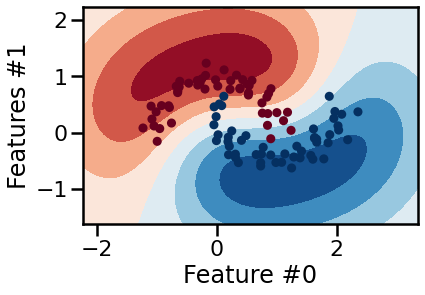

In [17]:
display = DecisionBoundaryDisplay.from_estimator(
    model, X, cmap=plt.cm.RdBu,
)
_ = moons.plot.scatter(
    x=feature_names[0], y=feature_names[1], c=y,
    s=50, cmap=plt.cm.RdBu, ax=display.ax_
)

We see that the decision boundary of this model is pretty similar to an SVM with an RBF kernel. Now, let's do an exercise to demonstrate the scaling limitation of the SVM classifier.

In [18]:
data = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,25,7,0,0,40,<=50K
1,38,9,0,0,50,<=50K
2,28,12,0,0,40,>50K
3,44,10,7688,0,40,>50K
4,18,10,0,0,30,<=50K


In [19]:
target_name = "class"
X = data.drop(columns=target_name)
y = data[target_name]

In [20]:
X.shape

(48842, 5)

The dataset contains almost 50,000 samples that is already a lot for an SVM model.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Split the dataset into a training and testing sets.</li>
        <li>Create a model containing a SVM that uses an RBF kernel. Check the time that the model needs to be fitted.</li>
        <li>Repeat the same experiment with a model that uses a Nystroem kernel approsimation and a logistic regression.</li>
        <li>Check the score of both models on the testing set.</li>
    </ul>
</div>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

In [22]:
%%time
model = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
model.fit(X_train, y_train)

CPU times: user 11.4 s, sys: 264 ms, total: 11.7 s
Wall time: 11.7 s


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [23]:
%%time
model.score(X_test, y_test)

CPU times: user 5.74 s, sys: 14.5 ms, total: 5.76 s
Wall time: 5.76 s


0.8242568176234543

In [24]:
%%time
model = make_pipeline(
    StandardScaler(), Nystroem(), LogisticRegression(max_iter=1_000)
)
model.fit(X_train, y_train)

CPU times: user 4.27 s, sys: 1.35 s, total: 5.62 s
Wall time: 799 ms


Pipeline(steps=[('standardscaler', StandardScaler()), ('nystroem', Nystroem()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [25]:
%%time
model.score(X_test, y_test)

CPU times: user 148 ms, sys: 75.1 ms, total: 223 ms
Wall time: 42.9 ms


0.8161493735156826